House price prediction Model 

In [160]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error 
from sklearn.preprocessing import LabelEncoder

In [161]:
## load dataset
df = pd.read_csv('house_prices.csv')


Data Exploratory 

In [162]:
df.shape

(21613, 21)

In [163]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,N,0,...,7,1180.0,0.0,1955,0,98178,47.5112,-122.257,1340.0,5650.0
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,N,0,...,7,2170.0,400.0,1951,1991,98125,47.7210,-122.319,1690.0,7639.0
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,N,0,...,6,770.0,0.0,1933,0,98028,47.7379,-122.233,2720.0,8062.0
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,N,0,...,7,1050.0,910.0,1965,0,98136,47.5208,-122.393,1360.0,5000.0
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,N,0,...,8,1680.0,0.0,1987,0,98074,47.6168,-122.045,1800.0,7503.0


In [164]:
df.dtypes

id                 int64
date              object
price              int64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront        object
view               int64
condition         object
grade              int64
sqft_above       float64
sqft_basement    float64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15    float64
sqft_lot15       float64
dtype: object

In [165]:
print(df.isnull().sum())

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       2
sqft_basement    1
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    1
sqft_lot15       1
dtype: int64


Preproccessing

In [166]:
# Handle missing values
df.fillna(df.mean(numeric_only=True), inplace=True)


In [167]:
print(df.isnull().sum())

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64


In [168]:
df['irrelevant_feature'] = np.random.rand(len(df))

In [169]:
X = df[['price', 'bedrooms', 'bathrooms', 'floors', 'sqft_living', 'sqft_lot', 'irrelevant_feature']]
y = df['price'] + np.random.normal(1000, 150000, size=len(df))  

In [170]:
X.shape

(21613, 7)

Split Data

In [171]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

Create and train

In [172]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

Make predictions

In [173]:
y_pred = model.predict(X_test)

Calculate MSE , MAE and R²

In [174]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R² Score: {r2}')

Mean Squared Error: 22220073934.78831
Mean Absolute Error: 119404.15312931339
R² Score: 0.8598269651701681


Visualization

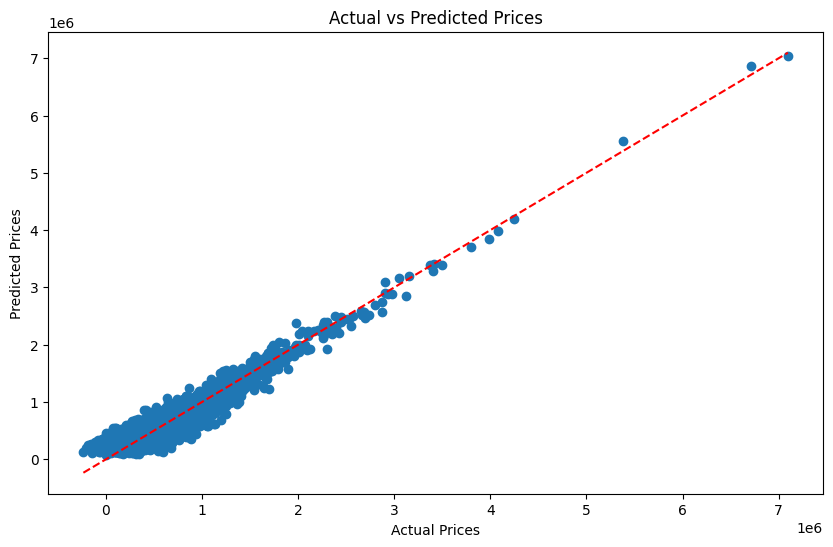

In [175]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.show()

In [176]:
from sklearn.linear_model import Ridge, Lasso

# Ridge Regression
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
ridge_r2 = ridge_model.score(X_test, y_test)
print(f'Ridge R²: {ridge_r2}')

# Lasso Regression
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)
lasso_r2 = lasso_model.score(X_test, y_test)
print(f'Lasso R²: {lasso_r2}')

Ridge R²: 0.8598269654503806
Lasso R²: 0.8598269596834487


In [177]:
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coefficients)

                    Coefficient
price                  0.999701
bedrooms            1415.896925
bathrooms           -174.212338
floors              -272.466151
sqft_living           -1.891065
sqft_lot               0.007419
irrelevant_feature  2102.917862
